In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [130]:
fc=pd.read_csv("E:/ASSIGNMENT FROM EXCELR/Decision Trees/Fraud_check.csv")
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [131]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [132]:
label_encoder = preprocessing.LabelEncoder()
fc["Undergrad"] = label_encoder.fit_transform(fc["Undergrad"])
fc["Marital.Status"] = label_encoder.fit_transform(fc["Marital.Status"])
fc["Urban"] = label_encoder.fit_transform(fc["Urban"])

In [133]:
x=fc.iloc[:,0:5]
y=fc['Urban']

In [134]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [135]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [136]:
#This code gives same as above result but in array format
array = fc.values
X = array[:,0:5]
Y = array[:,2]

In [137]:
X

array([[     0,      2,  68833,  50047,     10],
       [     1,      0,  33700, 134075,     18],
       [     0,      1,  36925, 160205,     30],
       ...,
       [     0,      0,  47334, 154058,      0],
       [     1,      1,  98592, 180083,     17],
       [     0,      0,  96519, 158137,     16]], dtype=int64)

In [138]:
Y

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [139]:
fc.loc[fc['Taxable.Income'] <= 30000,"Taxable_Income"] ="Risky"
fc.loc[fc['Taxable.Income'] > 30000, "Taxable_Income"] ="Good"

In [141]:
fc


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [142]:
fc['Urban'].unique()

array([1, 0])

In [143]:
fc.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [144]:
colnames = list(fc.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable_Income']

In [145]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [146]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(141.64615384615385, 190.26, 'X[2] <= 83161.5\nentropy = 1.0\nsamples = 480\nvalue = [240, 240]'),
 Text(51.50769230769231, 135.9, 'X[3] <= 28672.0\nentropy = 0.995\nsamples = 386\nvalue = [209, 177]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[3] <= 98131.5\nentropy = 0.997\nsamples = 379\nvalue = [202, 177]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.996\nsamples = 156\nvalue = [72, 84]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.98\nsamples = 223\nvalue = [130, 93]'),
 Text(231.7846153846154, 135.9, 'X[2] <= 94223.0\nentropy = 0.915\nsamples = 94\nvalue = [31, 63]'),
 Text(180.27692307692308, 81.53999999999999, 'X[3] <= 103332.0\nentropy = 0.729\nsamples = 59\nvalue = [12, 47]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.414\nsamples = 36\nvalue = [3, 33]'),
 Text(206.03076923076924, 27.180000000000007, 'entropy = 0.966\nsamples = 

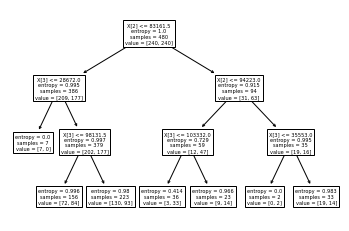

In [147]:
#PLot the decision tree
tree.plot_tree(model)

[Text(393.46153846153845, 792.75, 'Taxable.Income(cm) <= 83161.5\nentropy = 1.0\nsamples = 480\nvalue = [240, 240]\nclass = YES'),
 Text(143.07692307692307, 566.25, 'City.Population (cm) <= 28672.0\nentropy = 0.995\nsamples = 386\nvalue = [209, 177]\nclass = YES'),
 Text(71.53846153846153, 339.75, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = YES'),
 Text(214.61538461538458, 339.75, 'City.Population (cm) <= 98131.5\nentropy = 0.997\nsamples = 379\nvalue = [202, 177]\nclass = YES'),
 Text(143.07692307692307, 113.25, 'entropy = 0.996\nsamples = 156\nvalue = [72, 84]\nclass = NO'),
 Text(286.15384615384613, 113.25, 'entropy = 0.98\nsamples = 223\nvalue = [130, 93]\nclass = YES'),
 Text(643.8461538461538, 566.25, 'Taxable.Income(cm) <= 94223.0\nentropy = 0.915\nsamples = 94\nvalue = [31, 63]\nclass = NO'),
 Text(500.7692307692307, 339.75, 'City.Population (cm) <= 103332.0\nentropy = 0.729\nsamples = 59\nvalue = [12, 47]\nclass = NO'),
 Text(429.23076923076917, 113.25, 'entropy = 0.4

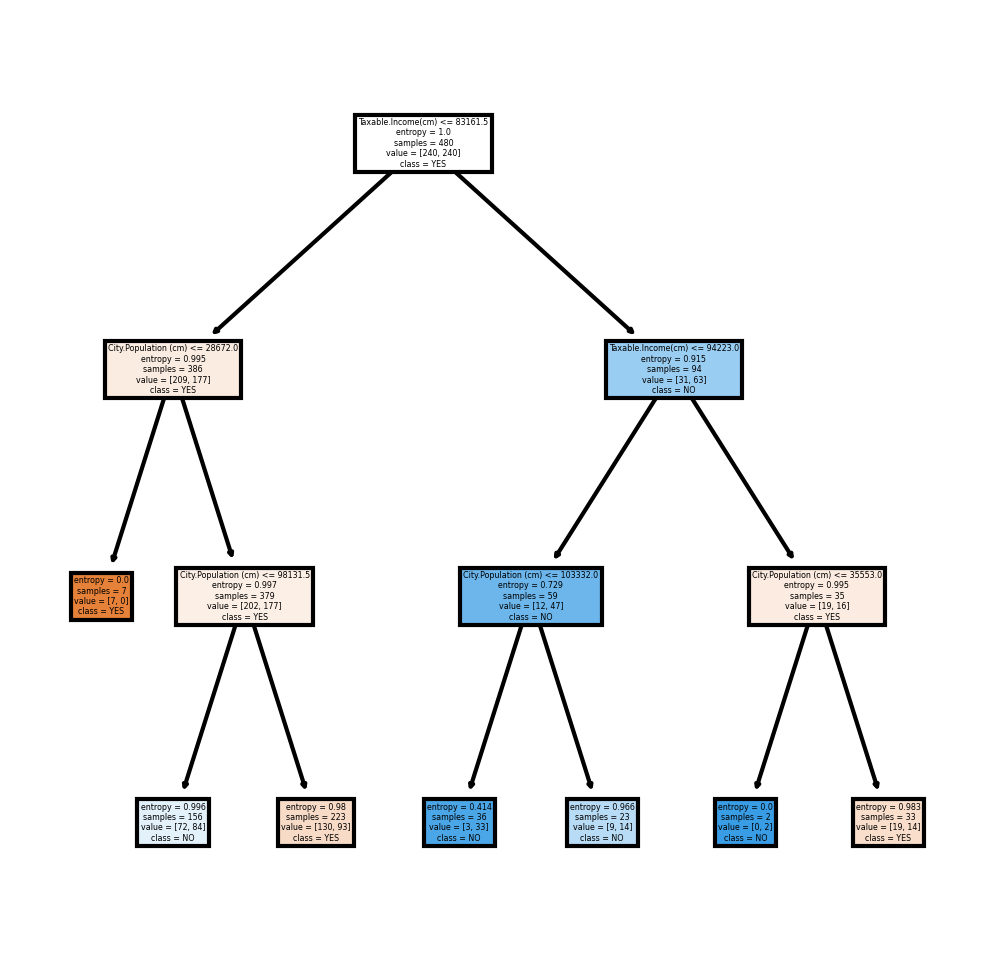

In [148]:
fn=['Undergrad (cm)','Marital.Status  (cm)','Taxable.Income(cm)','City.Population (cm)','Work.Experience (cm)']
cn=['YES', 'NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True)

In [149]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    64
1    56
dtype: int64

In [150]:
preds

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [151]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions"

col_0,0,1
Urban,,
0,33,25
1,31,31


In [152]:
# Accuracy
np.mean(preds==y_test)

0.5333333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [153]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [154]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [155]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5333333333333333

# Decision Tree Regression Example

In [156]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [157]:
array = fc.values
X = array[:,0:5]
y = array[:,5]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=1)

In [159]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [160]:
#Find the accuracy
model.score(X_test,y_test)

-1.0469924812030076

In [161]:
import numpy as np
pred=model.predict(X_test)

In [162]:
errors=pred - y_test
errors

array([0.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, 0.0,
       -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0,
       1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, -1.0, -1.0, 1.0, -1.0,
       -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, -1.0, 0.0,
       0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, -1.0, 1.0, -1.0, 0.0,
       -1.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, -1.0, 0.0, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0,
       0.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0,
       0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 1.0], dtype=object)

In [174]:
try:
    mape=np.mean(abs(errors/y_test))
except ZeroDivisionError:
    print(mape)

1


In [175]:
accuracy=1-mape
accuracy

0